# Recommendation System Project

### Context:
Everyday a million products are being recommended to users based on popularity and other metrics on e-commerce websites. The most popular e-commerce website boosts average order value by 50%, increases revenues by 300%, and improves conversion. In addition to being a powerful tool for increasing revenues, product recommendations are so essential that customers now expect to see similar features on all other eCommerce sites.


### Objective:
Build a recommendation system to recommend products to customers based on the their previous ratings for other products.

## 1. Read and explore the given dataset. ( Rename column/add headers, plot histograms, find data characteristics) ( 3 Marks) 

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
df = pd.read_csv('ratings_Electronics.csv')

In [2]:
# naming the columns
df.columns = ['user_id','product_id', 'ratings', 'timestamp']

#Dropping the Timestamp column
df.drop('timestamp',1, inplace=True)

In [3]:
#shape of data 
shape_Data = df.shape
print('Data set contains {} number of rows and {} number of columns' .format(shape_Data[0],shape_Data[1]))

print('')

#head of the data
df.head(10)

Data set contains 7824481 number of rows and 3 number of columns



,user_id,product_id,ratings
0,A2CX7LUOHB2NDG,0321732944,5.0
1,A2NWSAGRHCP8N5,0439886341,1.0
2,A2WNBOD3WNDNKT,0439886341,3.0
3,A1GI0U4ZRJA8WN,0439886341,1.0
4,A1QGNMC6O1VW39,0511189877,5.0
5,A3J3BRHTDRFJ2G,0511189877,2.0
6,A2TY0BTJOTENPG,0511189877,5.0
7,A34ATBPOK6HCHY,0511189877,5.0
8,A89DO69P0XZ27,0511189877,5.0
9,AZYNQZ94U6VDB,0511189877,5.0


In [4]:
# info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824481 entries, 0 to 7824480
Data columns (total 3 columns):
user_id       object
product_id    object
ratings       float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


In [5]:
# null value check
df.isna().sum()

user_id       0
product_id    0
ratings       0
dtype: int64

In [6]:
#Oveview of Data (summary statistics)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ratings,7824481.0,4.012337,1.38091,1.0,3.0,5.0,5.0,5.0


In [7]:
print('Total data')
print('-' *50)
print('\nTotal no of ratings :',df.shape[0])
print('Total No of Users   :', len(df['user_id'].unique()))
print('Total No of products  :', len(df['product_id'].unique()))

Total data
--------------------------------------------------

Total no of ratings : 7824481
Total No of Users   : 4201696
Total No of products  : 476001


### Insights
* There is no MISSING data
* There are 4 Attributes - UserId, ProductId are object Rating is Integer 
* Rating lies between 1-5

## 2. Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the users only who has given 50 or more number of ratings ) -(5 Marks)

* Since the input data has more than 7 million records, To avoid processing difficulties here we are filtering the data which only contains the users which has given ratings more than 100 times.

In [8]:
counts = pd.value_counts(df['user_id'])
df1 = df[df['user_id'].isin(counts[counts >= 50].index)]
print(df1.shape)
df1.head(10)

(125871, 3)


,user_id,product_id,ratings
93,A3BY5KCNQZXV5U,0594451647,5.0
117,AT09WGFUM934H,0594481813,3.0
176,A32HSNCNPRUMTR,0970407998,1.0
177,A17HMM1M7T9PJ1,0970407998,4.0
491,A3CLWR1UUZT6TG,0972683275,5.0
630,A3TAS1AG6FMBQW,0972683275,5.0
1002,A2Y4H3PXB07WQI,0972683275,4.0
1137,A25RTRAPQAJBDJ,0972683275,5.0
1309,A3LDPF5FMB782Z,1400501466,5.0
1321,A1A5KUIIIHFF4U,1400501466,1.0


In [9]:
# distribution of ratings
df1.ratings.value_counts()

5.0    71034
4.0    32295
3.0    12060
2.0     5367
1.0     5115
Name: ratings, dtype: int64

In [10]:
#distribution of ratings
import seaborn as sns
sns.distplot(df1['ratings'])

* Ratings are on scale of 1-5
* We can notice that large peak of rating "5", this may be because single user rating or some other kind of skewness.


In [11]:
# Analysis of rating given by the user 
most_rated_users = df1.user_id.value_counts().head(10)
most_rated_users

A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
A1ODOGXEYECQQ8    380
A36K2N527TXXJN    314
A2AY4YUOX2N1BQ    311
AWPODHOB4GFWL     308
A25C2M3QF9G7OQ    296
Name: user_id, dtype: int64

## 3. Build Popularity Recommender model. ( 15 marks)

Popularity based recommendation system works with the trend. It basically uses the items which are in trend right now. For example, if any product which is usually bought by every new user then there are chances that it may suggest that item to the user who just signed up.

The problems with popularity based recommendation system is that the personalization is not available with this method i.e. even though you know the behaviour of the user you cannot recommend items accordingly.

In [12]:
# Average ratings of each product based on the ratings they got from the users
df2 = pd.DataFrame(df1.groupby('product_id')['ratings'].mean())

# Number of ratings received of each prouduct
df2['rating_counts'] = pd.DataFrame(df1.groupby('product_id')['ratings'].count())

df2.rename(columns = {'ratings': 'avg_rating'}, inplace=True)

# Sorting the products on rating counts
df2.sort_values(by='rating_counts',ascending=False).head(10)

,avg_rating,rating_counts
product_id,,
B0088CJT4U,4.218447,206
B003ES5ZUU,4.864130,184
B000N99BBC,4.772455,167
B007WTAJTO,4.701220,164
B00829TIEK,4.436242,149
B008DWCRQW,4.094891,137
B00829THK0,4.416058,137
B002R5AM7C,4.125000,128
B004CLYEDC,4.669492,118


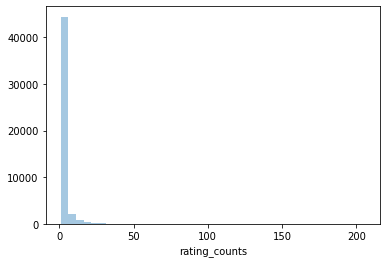

In [13]:
#checking distribution of rating_counts
sns.distplot(df2['rating_counts'],kde=False, bins=40)

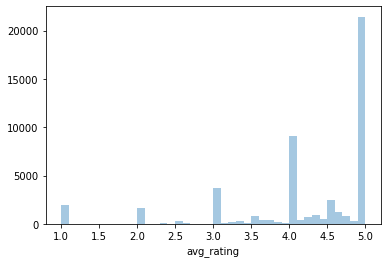

In [14]:
#checking distribution of rating
sns.distplot(df2['avg_rating'],kde=False, bins=40)

In [15]:
# Sorting the products on ratings count
df2_sort = df2.sort_values(by='rating_counts', ascending=False)

# ranking the products based on the number of ratings they got
df2_sort['rank'] = df2_sort['rating_counts'].rank(ascending=0, method='first')

# Getting the top 10 recommendations
popular_products = df2_sort.head(10)

popular_products.reset_index()

,product_id,avg_rating,rating_counts,rank
0,B0088CJT4U,4.218447,206,1.0
1,B003ES5ZUU,4.864130,184,2.0
2,B000N99BBC,4.772455,167,3.0
3,B007WTAJTO,4.701220,164,4.0
4,B00829TIEK,4.436242,149,5.0
5,B008DWCRQW,4.094891,137,6.0
6,B00829THK0,4.416058,137,7.0
7,B002R5AM7C,4.125000,128,8.0
8,B004CLYEDC,4.669492,118,9.0
9,B002SZEOLG,4.247788,113,10.0


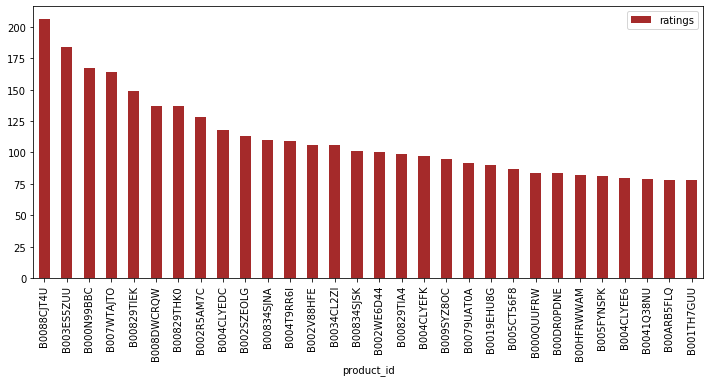

In [16]:
# top 30 popular products based on the number of ratings it received
pd.DataFrame(df1.groupby('product_id')['ratings'].count()).sort_values(by='ratings',ascending=False).head(30).plot(kind = 'bar', color='brown', figsize=(12,5));

In [17]:
# # figure=plt.figure(figsize=(10,5))
# recmetrics.long_tail_plot(df1,'product_id','ratings',percentage=0.5,x_labels=False)

In [18]:
# Use popularity based recommender model to make predictions
def recommend(user_id):     
    user_recommendations = popular_products 
          
    #Add user_id column for which the recommendations are being generated 
    user_recommendations['userID'] = user_id 
      
    #Bring user_id column to the front 
    cols = user_recommendations.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    user_recommendations = user_recommendations[cols] 
          
    return user_recommendations 

In [19]:
find_recom = [15,10]   # This list is user choice.
for i in find_recom:
    print('Here is the recommendation of products for the userId: {}'.format(i))
    print(recommend(i))    
    print("\n") 

Here is the recommendation of products for the userId: 15
            userID  avg_rating  rating_counts  rank
product_id                                         
B0088CJT4U      15    4.218447            206   1.0
B003ES5ZUU      15    4.864130            184   2.0
B000N99BBC      15    4.772455            167   3.0
B007WTAJTO      15    4.701220            164   4.0
B00829TIEK      15    4.436242            149   5.0
B008DWCRQW      15    4.094891            137   6.0
B00829THK0      15    4.416058            137   7.0
B002R5AM7C      15    4.125000            128   8.0
B004CLYEDC      15    4.669492            118   9.0
B002SZEOLG      15    4.247788            113  10.0


Here is the recommendation of products for the userId: 10
            userID  avg_rating  rating_counts  rank
product_id                                         
B0088CJT4U      10    4.218447            206   1.0
B003ES5ZUU      10    4.864130            184   2.0
B000N99BBC      10    4.772455            167   3.

* Since this is a popularity-based recommender model, recommendations remain the same for all users

* We predict the products based on the popularity. It is not personalized to particular user

## 4. Split the data randomly into a train and test dataset. ( For example, split it in 70/30 ratio) ( 2 marks) 

In [20]:
from surprise import SVD, KNNWithMeans
from surprise import accuracy
from surprise import Dataset,Reader
from surprise.model_selection import train_test_split

In [21]:
# Load the dataframe to surprise. Observation : Got memory error so considering almost 1% only of the original dataset!!
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df1, reader)

#Splitting the dataset
trainset, testset = train_test_split(data, test_size=.30)

## 5. Build Collaborative Filtering model. ( 20 marks)

#### Collaborative filtering is commonly used for recommender systems. These techniques aim to fill in the missing entries of a user-item association matrix. We are going to use collaborative filtering (CF) approach. CF is based on the idea that the best recommendations come from people who have similar tastes. In other words, it uses historical item ratings of like-minded people to predict how someone would rate an item.Collaborative filtering has two sub-categories that are generally called user based and item-based approaches.
#### Here we are going to use user user based collaborative filtering

#### KNNWithMeans

In [33]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
knn_model = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
knn_model.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


#### SVD Based Recommendation System

In [23]:
svd_model = SVD(n_factors=5,biased=False)
svd_model.fit(trainset)

### Collaborative filtering techniques aim to fill in the missing entries of a user-item association matrix.
### This is based on the idea that the best recommendations come from people who have similar tastes.

## 6. Evaluate the above model. ( Once the model is trained on the training data, it can be used to compute the error (like RMSE) on predictions made on the test data.) You can also use a different method to evaluate the models. ( 5 marks)


In [34]:
# run the trained model against the testset
test_pred_knn = knn_model.test(testset)
print(accuracy.rmse(test_pred_knn))

RMSE: 1.0473
1.0473155037397588


In [25]:
test_pred_svd = svd_model.test(testset)
accuracy.rmse(test_pred_svd)

RMSE: 1.6775


1.677462346210592

#### KNNWithMeans gave better results.


## 7. Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products. ( 10 marks)


In [35]:
pred_df = pd.DataFrame(test_pred_knn)
pred_df[pred_df['uid'] == 'A32AK8FOAZEPE2'][['iid', 'r_ui','est']].sort_values(by = 'r_ui',ascending = False).head(5)

,iid,r_ui,est
4018,B0009K4XI6,5.0,4.258759
19402,B0041DMFKA,5.0,4.258759
27987,B004K39QTY,5.0,4.258759
30721,B002QEBMAK,5.0,1.000000
1060,B001FFU1GC,3.0,4.258759


#### Here are the top 5 products to be displayed by the recommendation system to the above customer based on the purchase history of other customers in the website.
#### Thus we can notice
For User :A32AK8FOAZEPE2

Recommendation : 
['B0009K4XI6', 'B0041DMFKA', 'B004K39QTY', 'B002QEBMAK', 'B001FFU1GC']

## 8. Summarise your insights. ( 10 marks)

* We have 1st explored the basic EDA where we got to know that very less number of people rated more than 50 times and we have filtered the data to minimum of 50 users have given the ratings.
* We  first used a popularity based recommender model where we recommended top 5 products where we had cold start problem.(No user info/user insight availble)
* Then we have developed a Collaborative Filtering model where we recommended the products based on the similarity between the users taste and We call it user-user collaborative filtering model. For similarity we have used pearson correlation but we can use cosine similarity also to find out distance between our feature vectors.
* We computed RMSE to check the performance of our models and got very low RMSE with KnnWithMeans 
* We have also used Matrix factorization or SVD (Singular Vector Decomposition) to develop a model where we can recommend set of 5 products to each individual users.